# EDA on Financial Services

## Aim: 
 To give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of business analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
## Business Problem: 
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.
Our objective is to provide a complete analysis of the behaviour of the customers and understand who or which category/background people having what attributes has more defaulters.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 

In [2]:
df = pd.read_csv("C:/Users/aspire 5/OneDrive/Desktop/projects/application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
df.shape

(307511, 122)

In [5]:
# finding the missing values
missing = pd.DataFrame(df.isnull().sum().sort_values()).reset_index()
missing.rename(columns = {"index": "colname" , 0 : "nulls"}, inplace = True)
missing

,colname,nulls
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0
5,REG_CITY_NOT_WORK_CITY,0
6,LIVE_CITY_NOT_WORK_CITY,0
7,ORGANIZATION_TYPE,0
8,FLAG_DOCUMENT_21,0
9,FLAG_DOCUMENT_20,0


In [6]:
#proportion 
missing["percentage"] = missing["nulls"]/df.shape[0]*100

In [7]:
missing

,colname,nulls,percentage
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
5,REG_CITY_NOT_WORK_CITY,0,0.000000
6,LIVE_CITY_NOT_WORK_CITY,0,0.000000
7,ORGANIZATION_TYPE,0,0.000000
8,FLAG_DOCUMENT_21,0,0.000000
9,FLAG_DOCUMENT_20,0,0.000000


finding the percentage of missing values and dropping the columns having more than 35% of null values. 

In [8]:
nullcol = missing[missing["percentage"]>=35]["colname"].to_list()
print(len(nullcol))

49


In [9]:
dfnulldrop = df.drop(labels = nullcol, axis =1)
dfnulldrop.shape

(307511, 73)

In [10]:
dfnulldrop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Anlysing all flag columns
flag_col = []
for i in dfnulldrop.columns:
    if i.startswith("FLAG_"):
        flag_col.append(i)

In [12]:
print(flag_col)
print(len(flag_col))

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
28


Analysing flag columns

In [13]:
FTCOL= dfnulldrop[flag_col+ ["TARGET"]]
FTCOL.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


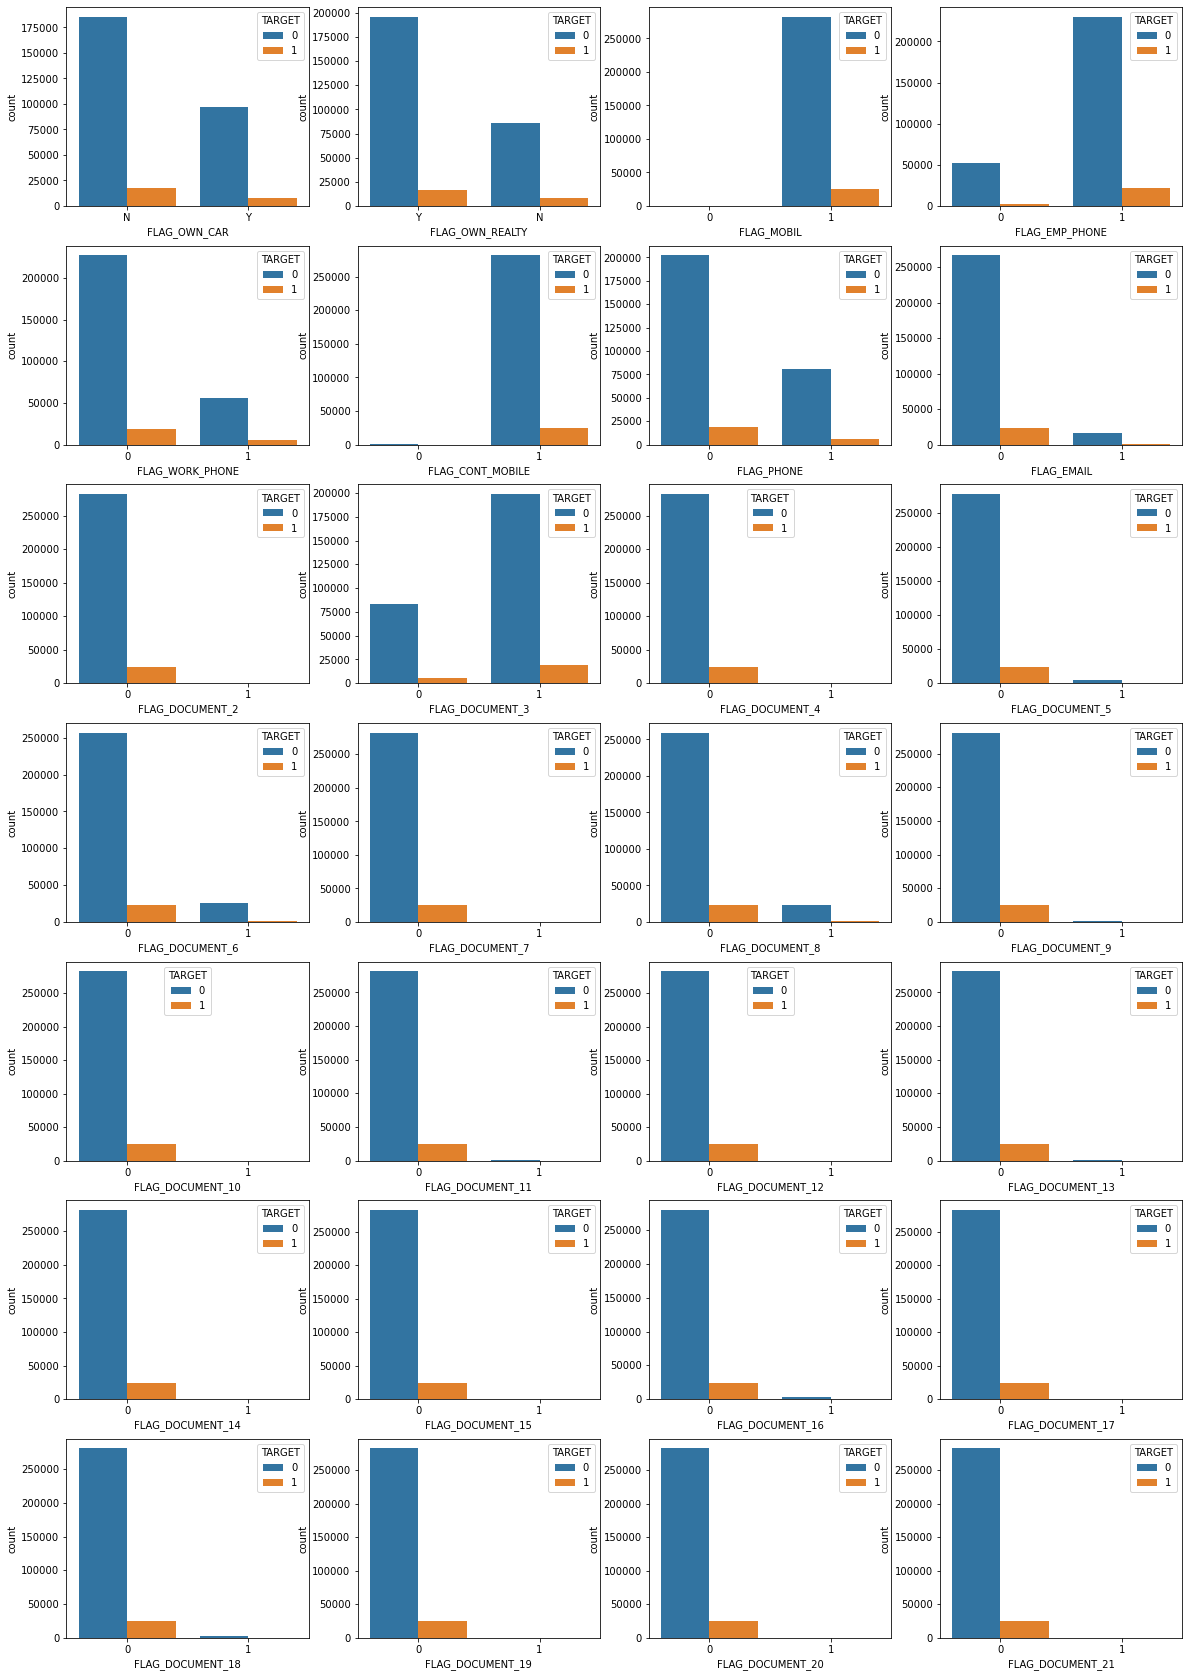

In [14]:
plt.figure(figsize=(20,30))
for i,j in enumerate(flag_col):
    plt.subplot(7,4,i+1)
    sns.countplot(data = FTCOL, x = j, hue = "TARGET")

except flag document 3, we can see that almost every customer is non defaulter even if the document is not submitted. 

In [15]:
otherflag = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
'FLAG_EMAIL' , 'TARGET']
otherflagdf = dfnulldrop[otherflag]
otherflagdf.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [16]:
otherflagdf.groupby(["FLAG_OWN_CAR"]).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [17]:
otherflagdf["FLAG_OWN_CAR"] = otherflagdf["FLAG_OWN_CAR"].replace({"N": 0, "Y":1})
otherflagdf["FLAG_OWN_REALTY"] = otherflagdf["FLAG_OWN_REALTY"].replace({"N": 0, "Y":1})

<AxesSubplot:>

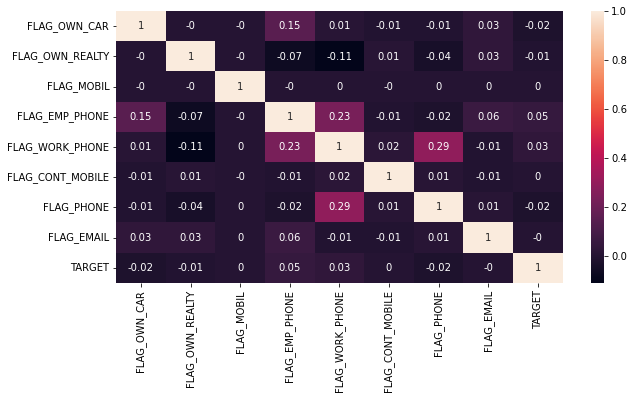

In [18]:
correlation = round(otherflagdf.corr(),2)
plt.figure(figsize = (10,5))
sns.heatmap(correlation, annot = True)

as we can see, these columns do not have very good correlation with target variable. therefore, we will drop them too.  

In [19]:
flagdrop = dfnulldrop.drop(labels =['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'] , axis = 1)
flagdrop.shape

(307511, 45)

In [20]:
flagdrop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

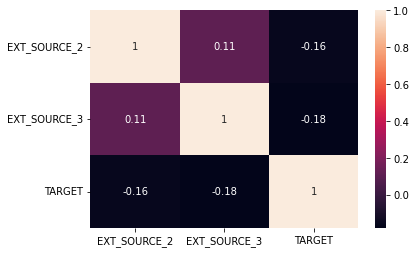

In [21]:
sns.heatmap(round(flagdrop[["EXT_SOURCE_2", "EXT_SOURCE_3", "TARGET"]].corr(),2), annot= True)

ext source also do not have much correlation with target. therefore, we will also drop this.

In [22]:
extre = flagdrop.drop(["EXT_SOURCE_2", "EXT_SOURCE_3"], axis=1)
extre.shape

(307511, 43)

now we are left with 43 columns.
Now, we will do the missing imputation. 

In [23]:
extre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [24]:
extre.isnull().sum().sort_values()/extre.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT           0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
REGION_POPULATION_RELATIVE     0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
CODE_GENDER                    0.000000
NAME_INCOME_TYPE               0.000000


In [25]:
#imputing cnt_family_members
extre.groupby("CNT_FAM_MEMBERS").size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158357
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [26]:
extre["CNT_FAM_MEMBERS"].mode()

0    2.0
dtype: float64

In [27]:
extre["CNT_FAM_MEMBERS"] = extre["CNT_FAM_MEMBERS"].fillna((extre["CNT_FAM_MEMBERS"].mode()[0]))

In [28]:
extre["CNT_FAM_MEMBERS"].isnull().sum()

0

In [29]:
#imputing occupation type
extre.groupby(["OCCUPATION_TYPE"]).size().sort_values()

OCCUPATION_TYPE
IT staff                   526
HR staff                   563
Realty agents              751
Secretaries               1305
Waiters/barmen staff      1348
Low-skill Laborers        2093
Private service staff     2652
Cleaning staff            4653
Cooking staff             5946
Security staff            6721
Medicine staff            8537
Accountants               9813
High skill tech staff    11380
Drivers                  18603
Managers                 21371
Core staff               27570
Sales staff              32102
Laborers                 55186
dtype: int64

In [30]:
# filling missing values with laborers as it is the maximum or we can say mode is laborers 
extre["OCCUPATION_TYPE"].mode()[0]

'Laborers'

In [31]:
extre["OCCUPATION_TYPE"] = extre["OCCUPATION_TYPE"].fillna((extre["OCCUPATION_TYPE"].mode()[0]))

In [32]:
extre["OCCUPATION_TYPE"].isnull().sum()

0

In [33]:
#imputing NAME_TYPE_SUITE
extre["NAME_TYPE_SUITE"].isnull().sum()

1292

In [34]:
extre["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [35]:
extre.groupby(["NAME_TYPE_SUITE"]).size()

NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248526
dtype: int64

In [36]:
extre["NAME_TYPE_SUITE"] = extre["NAME_TYPE_SUITE"].fillna((extre["NAME_TYPE_SUITE"].mode()[0]))

In [37]:
extre["NAME_TYPE_SUITE"].isnull().sum()

0

In [38]:
#imputing amt_annuity
extre["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [39]:
extre["AMT_ANNUITY"] = extre["AMT_ANNUITY"].fillna((extre["AMT_ANNUITY"].mean()))

In [40]:
extre["AMT_ANNUITY"].isnull().sum()

0

In [41]:
extre["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [42]:
query = []
for i in extre.columns:
    if i.startswith("AMT_REQ_CREDIT_BUREAU"):
        query.append(i)
query

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [43]:
for i in query:
    extre[i] = extre[i].fillna((extre[i].median()))

In [44]:
extre[i].isnull().sum()

0

In [45]:
#imputing AMT_GOODS_PRICE
extre["AMT_GOODS_PRICE"].isnull().sum()

278

In [46]:
extre["AMT_GOODS_PRICE"].agg(['min','max', 'median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [47]:
extre["AMT_GOODS_PRICE"].mean()

538396.2074288895

In [48]:
extre["AMT_GOODS_PRICE"].mode()[0]

450000.0

In [49]:
extre["AMT_GOODS_PRICE"] =extre["AMT_GOODS_PRICE"].fillna((extre["AMT_GOODS_PRICE"].median()))

In [50]:
extre["AMT_GOODS_PRICE"].isnull().sum()

0

In [51]:
extre.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#converting negative values into positive
days = []
for i in extre.columns:
    if i.startswith("DAYS"):
        days.append(i)
days
    

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [53]:
for i in days:
    extre[i] = abs(extre[i])

In [54]:
extre.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
#binning
extre["AMT_GOODS_PRICE"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [56]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
slot = ["0-100k","100k-200k","200k-300k", "300k-400k", "400k-500k","500k-600k", "600k-700k", "700k-800k","800k-900k","above 900k"]
extre["AMT_GOODS_PRICE_RANGE"] = pd.cut(extre["AMT_GOODS_PRICE"],bins, labels = slot)

In [57]:
extre.groupby(["AMT_GOODS_PRICE_RANGE"]).size()

AMT_GOODS_PRICE_RANGE
0-100k         8709
100k-200k     32956
200k-300k     62761
300k-400k     21219
400k-500k     57251
500k-600k     13117
600k-700k     40024
700k-800k      8110
800k-900k     21484
above 900k    41880
dtype: int64

In [58]:
extre["AMT_INCOME_TOTAL"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
extre["AMT_INCOME_TOTAL"].max()

117000000.0

In [60]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000 ]
slot = ["0-100k","100k-150k","150k-200k","200k-250k","250k-300k", "300k-350k","350k-400k", "above 400k"]
extre["AMT_INCOME_TOTAL_RANGE"] = pd.cut(extre["AMT_INCOME_TOTAL"],bins, labels = slot)

In [61]:
extre.groupby(["AMT_INCOME_TOTAL_RANGE"]).size()

AMT_INCOME_TOTAL_RANGE
0-100k        63698
100k-150k     91591
150k-200k     64307
200k-250k     48137
250k-300k     17039
300k-350k      8874
350k-400k      5802
above 400k     8063
dtype: int64

In [62]:
extre["AMT_CREDIT"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [63]:
extre["AMT_CREDIT"].max()

4050000.0

In [64]:
bins = [0,200000,400000,600000,800000,1000000,4050000]
slot = ["0-200k","200k-400k","400k-600k","600k-800k","800k-1M", "above 1M"]
extre["AMT_CREDIT_RANGE"] = pd.cut(extre["AMT_CREDIT"],bins, labels = slot)

In [65]:
extre.groupby(["AMT_CREDIT_RANGE"]).size()

AMT_CREDIT_RANGE
0-200k       36144
200k-400k    81151
400k-600k    66270
600k-800k    43242
800k-1M      30719
above 1M     49985
dtype: int64

In [66]:
extre["AMT_ANNUITY"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [67]:
extre["AMT_ANNUITY"].max()

258025.5

In [68]:
bins = [0,20000,40000,60000,80000,100000,120000,140000,258025.5]
slot = ["0-20k","20k-40k","40k-60k","60K-80K","80K-100K","100K-120K","120K-140K","above 140K"]
extre["AMT_ANNUITY_RANGE"] = pd.cut(extre["AMT_ANNUITY"],bins, labels = slot)

In [69]:
extre.groupby(["AMT_ANNUITY_RANGE"]).size()

AMT_ANNUITY_RANGE
0-20k         106505
20k-40k       151040
40k-60k        41834
60K-80K         6609
80K-100K        1018
100K-120K        313
120K-140K        111
above 140K        81
dtype: int64

In [70]:
extre["DAYS_EMPLOYED"].agg(['min','max', 'median'])

min            0.0
max       365243.0
median      2219.0
Name: DAYS_EMPLOYED, dtype: float64

In [71]:
extre["DAYS_EMPLOYED"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10       392.0
0.20       749.0
0.30      1132.0
0.40      1597.0
0.50      2219.0
0.60      3032.0
0.70      4435.0
0.80      9188.0
0.90    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

In [72]:
bins = [0,1825,3650,5457,7300,9125,10950,12775,14600,16425,18250,365243]
slot = ["0-5Y","5Y-10Y","10Y-15Y","15Y-20Y","20Y-25Y","25Y-30Y","30Y-35Y","35Y-40Y","40Y-45Y","45Y-50Y","above 50Y"]
extre["DAYS_EMPLOYED_RANGE"] = pd.cut(extre["DAYS_EMPLOYED"],bins, labels = slot)

In [73]:
extre.groupby(["DAYS_EMPLOYED_RANGE"]).size()

DAYS_EMPLOYED_RANGE
0-5Y         136309
5Y-10Y        64872
10Y-15Y       27336
15Y-20Y       11062
20Y-25Y        6243
25Y-30Y        3308
30Y-35Y        1939
35Y-40Y         832
40Y-45Y         210
45Y-50Y          24
above 50Y     55374
dtype: int64

In [74]:
extre["DAYS_EMPLOYED"].isnull().sum()

0

In [75]:
extre["DAYS_BIRTH"].max()

25229

In [76]:
extre["DAYS_BIRTH"].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10    10284.0
0.20    11694.0
0.30    13140.0
0.40    14416.0
0.50    15750.0
0.60    17220.0
0.70    18885.0
0.80    20474.0
0.90    22181.0
0.99    24419.0
Name: DAYS_BIRTH, dtype: float64

In [77]:
bins = [0,7300,10950,14600,18250,21900,25229]
slot = ["20Y","20Y30Y","30Y-40Y","40Y-50Y","50Y-60Y","above 50Y"]
extre["DAYS_BIRTH_RANGE"] = pd.cut(extre["DAYS_BIRTH"],bins, labels = slot)

In [78]:
extre.groupby(["DAYS_BIRTH_RANGE"]).size()

DAYS_BIRTH_RANGE
20Y              0
20Y30Y       45021
30Y-40Y      82308
40Y-50Y      76541
50Y-60Y      68062
above 50Y    35579
dtype: int64

In [79]:
extre["DAYS_BIRTH"].isnull().sum()

0

In [80]:
#analysis
extre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   CNT_CHILDREN                 307511 non-null  int64   
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  object  
 10  NAME_INCOME_TYPE             307511 non-null  object  
 11  NAME_EDUCATION_TYPE          307511 non-null  object  
 12  NAME_FAMILY_STATUS           307511 non-null

In [81]:
extre.dtypes.value_counts()

float64     18
int64       15
object      10
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [82]:
objects = extre.select_dtypes(include=['object']).columns
objects

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [83]:
extre.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

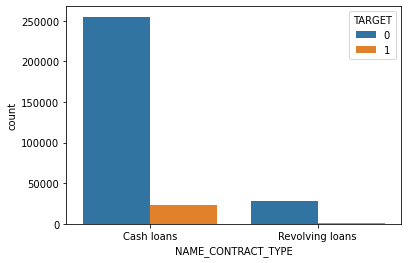

In [84]:
sns.countplot(data=extre, x = 'NAME_CONTRACT_TYPE', hue = "TARGET")

In [85]:
ctpercent = extre[['NAME_CONTRACT_TYPE', "TARGET"]].groupby(['NAME_CONTRACT_TYPE'], as_index = False).mean()
ctpercent

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


Most of the customer took cash loans and their proportion of defaulters are less compared to revolving loans.

In [86]:
ctpercent["pct"] = ctpercent["TARGET"]*100
ctpercent

,NAME_CONTRACT_TYPE,TARGET,pct
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


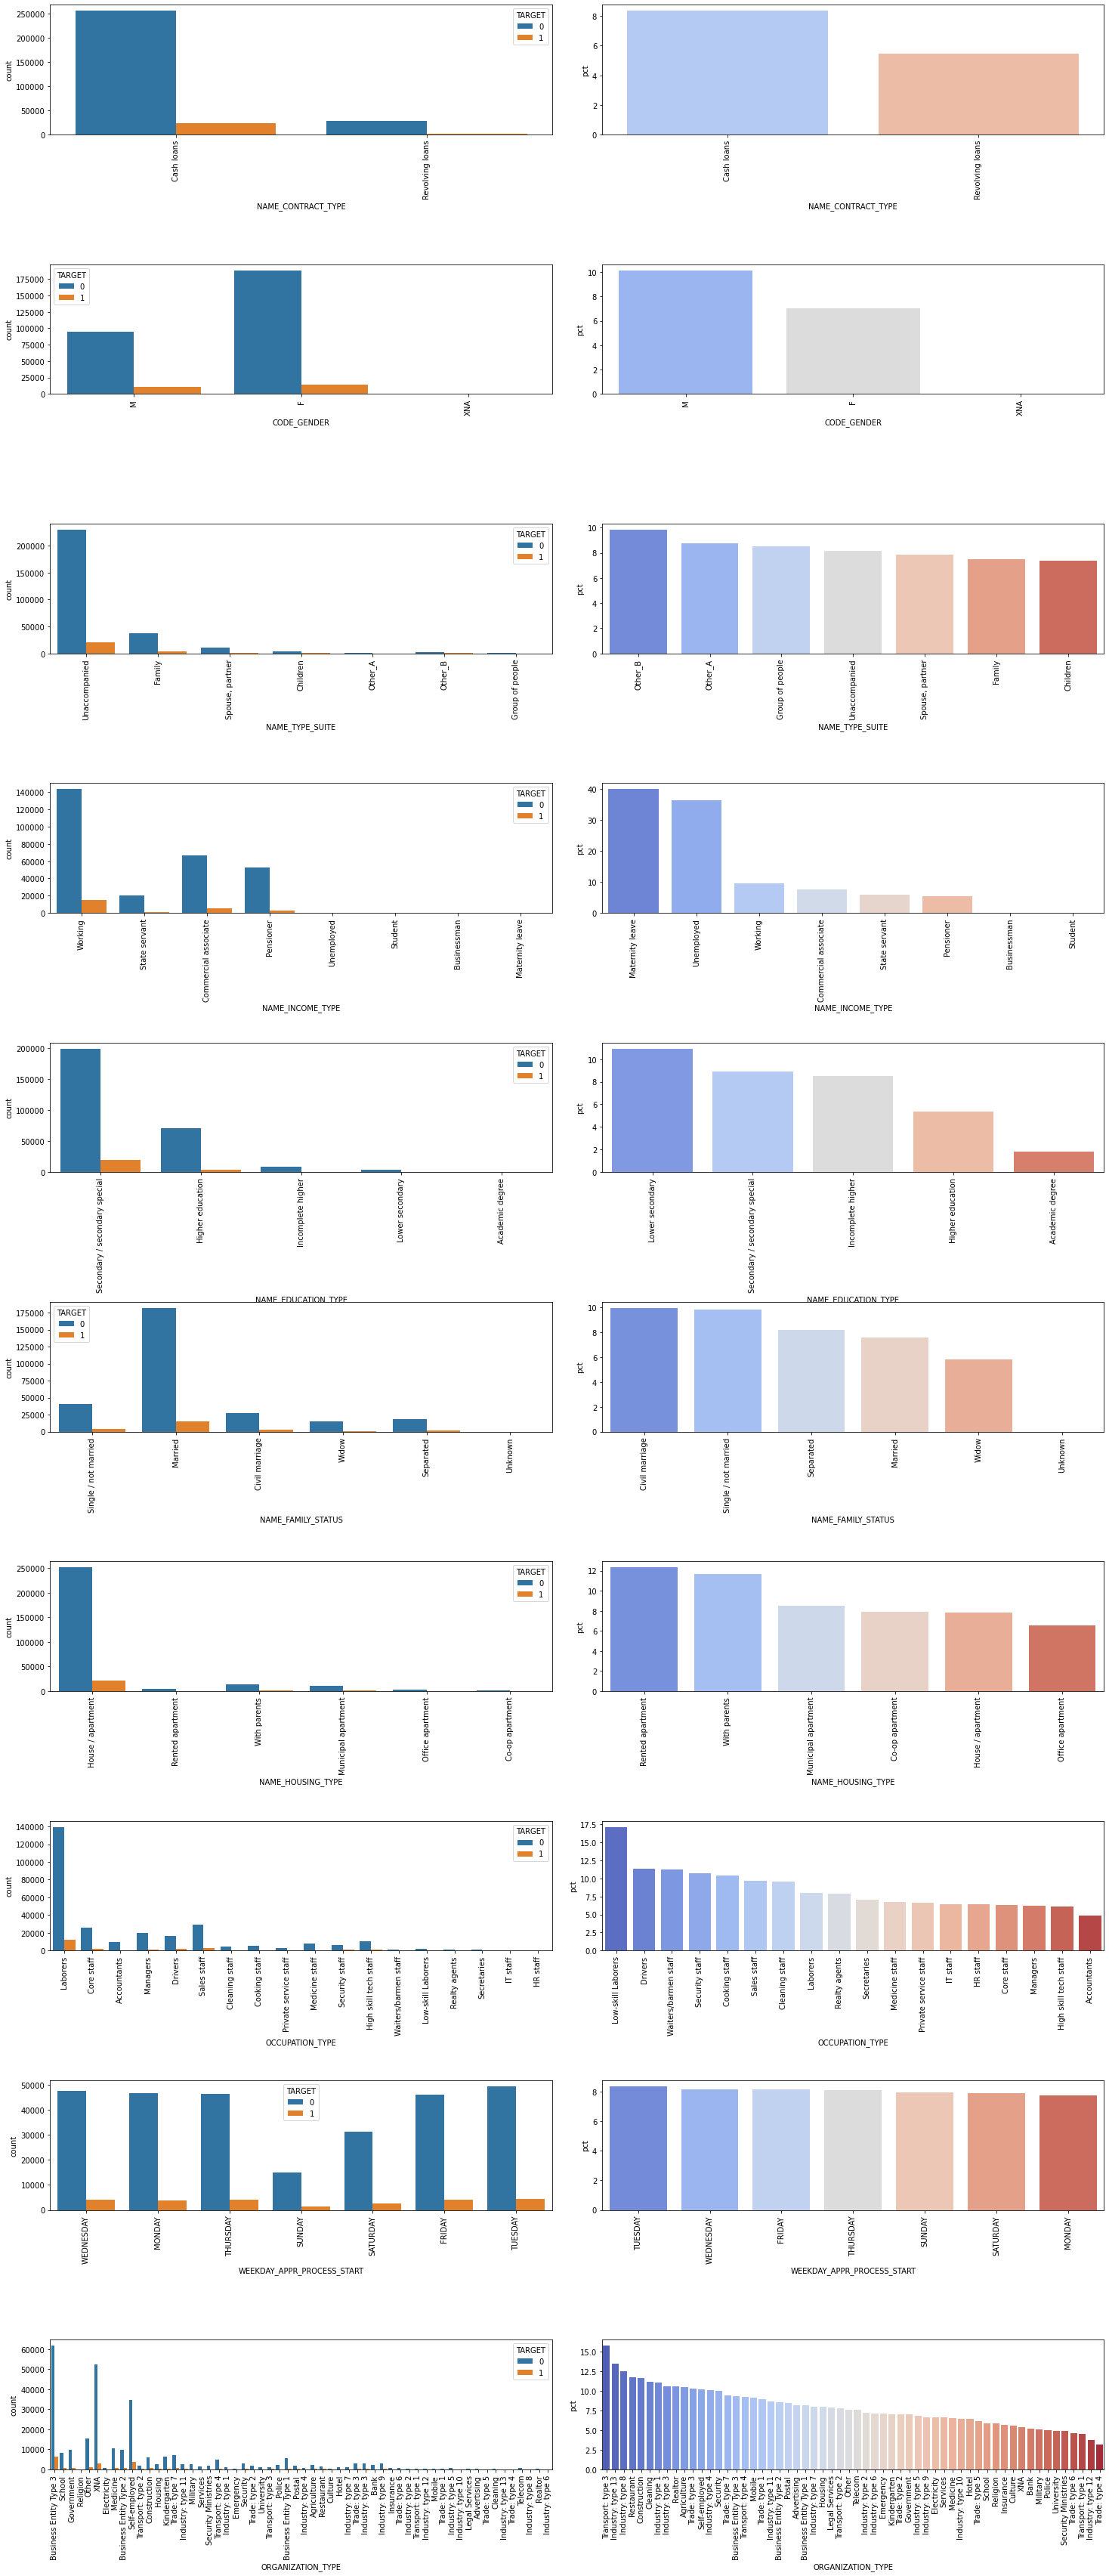

In [87]:
plt.figure(figsize = (25,60))
for i , j in enumerate(objects):
    ctpercent = extre[[j, "TARGET"]].groupby([j], as_index = False).mean().sort_values(by = "TARGET", ascending = False)
    ctpercent["pct"] = ctpercent["TARGET"]*100
    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace = 0.1, hspace =1)
    sns.countplot(data=extre, x = j, hue = "TARGET")
    plt.xticks(rotation = 90)
    
    
    plt.subplot(10,2,i+i+2)
    sns.barplot(data= ctpercent, x =j, y="pct", palette = "coolwarm")
    plt.xticks(rotation = 90)

- Code_gender : most of the loans have been taken by females and safer too as compared to males
- Name_type_suite : unaccompanied people took the most number of loan but they are safe.
- Name_income_type: working, commercial associates, state servant and pensioners are safest
- Name_education_type: higher education have very less number of default rate
- Family_status: married people have less default payments
- Housing_type: house apartments are safe
- occupation_type: Core staff, managers and laborers are safe but low skilled laborers are not
- Organisation_type: business entity 3 , self employed and others are safe but transport is not recommended. 

In [88]:
num = extre.select_dtypes(include=['float64',"int64"]).columns
numcat = extre.select_dtypes(include=['float64',"int64", 'category']).columns
num

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [89]:
len(numcat)

39

In [90]:
numdata= extre[numcat]

In [91]:
numdata.groupby(['TARGET']).size()/numdata.shape[0]*100

TARGET
0    91.927118
1     8.072882
dtype: float64

As we can see target column has very less percentage of defaulters, just around 8% there we will create two subsets, in order to get right outcome.


In [92]:
defaulters = numdata[numdata["TARGET"] ==1].drop(['TARGET'], axis = 1)
defaulters.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300k-400k,200k-250k,400k-600k,20k-40k,0-5Y,20Y30Y
26,100031,0,112500.0,979992.0,27076.5,702000.0,0.018029,18724,2628,6573.0,1827,1.0,3,2,9,0,0,0,0,0,0,10.0,1.0,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,700k-800k,100k-150k,800k-1M,20k-40k,5Y-10Y,50Y-60Y
40,100047,0,202500.0,1193580.0,35028.0,855000.0,0.025164,17482,1262,1182.0,1029,2.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,800k-900k,200k-250k,above 1M,20k-40k,0-5Y,40Y-50Y
42,100049,0,135000.0,288873.0,16258.5,238500.0,0.007305,13384,3597,45.0,4409,2.0,3,3,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,200k-300k,100k-150k,200k-400k,0-20k,5Y-10Y,30Y-40Y
81,100096,0,81000.0,252000.0,14593.5,252000.0,0.028663,24794,365243,5391.0,4199,2.0,2,2,10,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,0-100k,200k-400k,0-20k,above 50Y,above 50Y


In [93]:
nondefaulters = numdata[numdata["TARGET"] ==0]
nondefaulters.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,above 900k,250k-300k,above 1M,20k-40k,0-5Y,40Y-50Y
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100k-200k,0-100k,0-200k,0-20k,0-5Y,50Y-60Y
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,100k-150k,200k-400k,20k-40k,5Y-10Y,50Y-60Y
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,500k-600k,100k-150k,400k-600k,20k-40k,5Y-10Y,50Y-60Y
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,477,2.0,2,2,16,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,400k-500k,0-100k,400k-600k,20k-40k,0-5Y,40Y-50Y


In [94]:
#correlation 
defcor = defaulters.corr()
defcor

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,0.002539,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,-0.009395,-0.005549,-0.009058,-0.009428,-0.002455,-0.011106,-0.007388,-0.003075,0.005180,-0.001614,0.006843
CNT_CHILDREN,-0.005144,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,0.032299,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,0.025804,0.001448,0.025180,-0.005106,-0.011547,0.000316,-0.011255,-0.009316,-0.008852,-0.013029,-0.027253
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,0.004215,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.004709,-0.005186,-0.004616,-0.004866,0.002429,0.001079,0.000135,0.000941,0.005718,0.001037,0.004516
AMT_CREDIT,-0.001290,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,0.052329,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.019098,-0.025979,0.019487,-0.030880,0.110851,-0.003771,0.004346,0.010598,0.056227,-0.007201,-0.020698
AMT_ANNUITY,-0.007578,0.031257,0.046421,0.752195,1.000000,0.752295,0.071690,0.014303,-0.081207,-0.034279,0.016767,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.004463,-0.022394,0.005500,-0.027495,0.079870,0.012968,0.000074,0.028784,0.049000,-0.007261,-0.009819
AMT_GOODS_PRICE,-0.001814,-0.008111,0.037591,0.982783,0.752295,1.000000,0.076053,0.135738,0.006648,0.025661,0.056061,0.047367,-0.066367,-0.077170,0.044302,0.022406,0.036285,0.035505,-0.034085,-0.038915,-0.016703,0.019892,-0.021781,0.020366,-0.026175,0.118232,-0.002451,0.005457,0.010793,0.059112,-0.006114,-0.022811
REGION_POPULATION_RELATIVE,0.006301,-0.031975,0.009135,0.069161,0.071690,0.076053,1.000000,0.048190,0.015532,0.056222,0.015537,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.006224,0.025865,0.006793,0.018231,0.055139,-0.000710,-0.004546,0.003485,0.065248,-0.004433,0.003198
DAYS_BIRTH,0.001254,-0.259109,-0.003096,0.135316,0.014303,0.135738,0.048190,1.000000,0.582185,0.289114,0.252863,-0.203267,-0.033928,-0.033631,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.005164,-0.004946,0.005391,-0.004001,0.111199,-0.011650,0.007956,0.008244,0.010923,0.022904,0.083838
DAYS_EMPLOYED,-0.005161,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.015532,0.582185,1.000000,0.192455,0.229090,-0.186515,0.003490,0.002888,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484,-0.008019,0.003191,-0.008305,0.005391,0.001402,-0.007307,0.019381,0.013237,-0.023088,0.012230,0.030812
DAYS_REGISTRATION,-0.006342,-0.149154,-0.000158,0.025854,-0.034279,0.025661,0.056222,0.289114,0.192455,1.000000,0.096833,-0.145828,-0.103855,-0.100285,0.032518,-0.020403,-0.021183,-0.015547,-0.048585,-0.088427,-0.062636,-0.014104,-0.010299,-0.014522,-0.009157,0.071727,0.004798,0.007868,-0.002278,-0.003401,0.012512,0.013572


In [95]:
defunstack = defcor.where(np.triu(np.ones(defcor.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns = {'level_0':'var1',
                                                                                                           'level_2':'var2',
                                                                                                          0:'corr'})

In [96]:
#top10 highly correlated values
defunstack['corr'] = abs(defunstack['corr'])
defunstack.dropna(subset = ['corr']).sort_values(by = ['corr'], ascending = False).head(10)

,var1,level_1,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
131,AMT_ANNUITY,AMT_CREDIT,0.752195
263,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [97]:
ndefcor = nondefaulters.corr()
ndefcor.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000235,0.000360,0.001346,0.001744,0.001475,0.000077,-0.002789,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,-0.000695,0.000556,-0.000741,0.002382,0.000998,-0.001774,-0.001626,0.002298,-0.000037,0.000963,0.003852
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000559,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,0.014471,-0.002246,0.014137,-0.002172,0.008501,0.000147,0.001057,-0.000315,-0.007640,-0.004218,-0.035861
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418949,0.349426,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.034254,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,-0.027828,-0.027621,-0.027690,-0.027593,0.041338,0.002707,0.008029,0.008647,0.058682,0.017676,0.034384
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771297,0.987022,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,-0.000914,-0.019851,-0.000892,-0.022225,0.069540,-0.002267,0.005135,0.000941,0.055063,0.021825,-0.037519


In [98]:
ndefunstack = ndefcor.where(np.triu(np.ones(ndefcor.shape),k=1).astype(np.bool)).unstack().reset_index().rename(columns = {'level_0':'var1',
                                                                                                           'level_2':'var2',
                                                                                                          0:'corr'})

In [99]:
ndefunstack['corr'] = abs(ndefunstack['corr'])
ndefunstack.dropna(subset = ['corr']).sort_values(by = ['corr'], ascending = False).head(10)

,var1,level_1,corr
814,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
202,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
475,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
398,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
611,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
848,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
713,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
203,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
169,AMT_ANNUITY,AMT_CREDIT,0.771297
305,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


In [100]:
numdata.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300k-400k,200k-250k,400k-600k,20k-40k,0-5Y,20Y30Y
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,above 900k,250k-300k,above 1M,20k-40k,0-5Y,40Y-50Y
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100k-200k,0-100k,0-200k,0-20k,0-5Y,50Y-60Y
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,100k-150k,200k-400k,20k-40k,5Y-10Y,50Y-60Y
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,500k-600k,100k-150k,400k-600k,20k-40k,5Y-10Y,50Y-60Y


In [101]:
amounts = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", "AMT_GOODS_PRICE"]

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

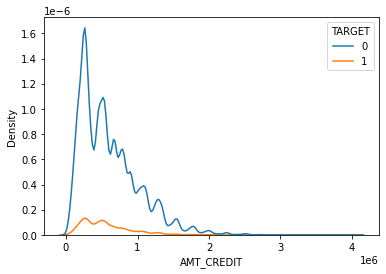

In [102]:
sns.kdeplot(data = numdata , x = 'AMT_CREDIT', hue = 'TARGET')

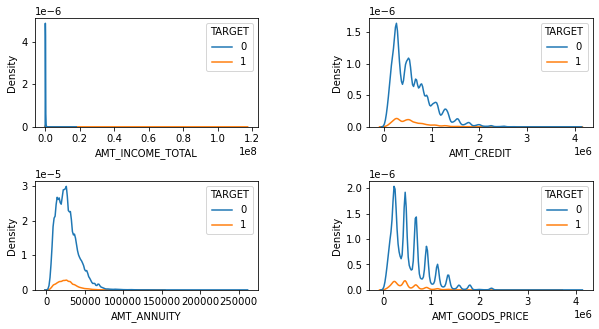

In [103]:
plt.figure(figsize = (10,5))

for i, j in enumerate(amounts):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data = numdata , x = j , hue = "TARGET")
    plt.subplots_adjust(wspace = 0.5 , hspace = 0.5)

- most loans were given for the good price falling between 0 to 1 million
- most credit amounts are ranging between 0 to 1 million
- maximum annuity is ranging between 0 to 50,000
- most of the customers have income between 0 to 1 million

In [104]:
numdata.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_RANGE,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,DAYS_EMPLOYED_RANGE,DAYS_BIRTH_RANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,2120,1.0,2,2,10,0,0,0,0,0,0,2.0,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,300k-400k,200k-250k,400k-600k,20k-40k,0-5Y,20Y30Y
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,291,2.0,1,1,11,0,0,0,0,0,0,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,above 900k,250k-300k,above 1M,20k-40k,0-5Y,40Y-50Y
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,2531,1.0,2,2,9,0,0,0,0,0,0,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,100k-200k,0-100k,0-200k,0-20k,0-5Y,50Y-60Y
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,2437,2.0,2,2,17,0,0,0,0,0,0,2.0,0.0,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,100k-150k,200k-400k,20k-40k,5Y-10Y,50Y-60Y
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,3458,1.0,2,2,11,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,500k-600k,100k-150k,400k-600k,20k-40k,5Y-10Y,50Y-60Y


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

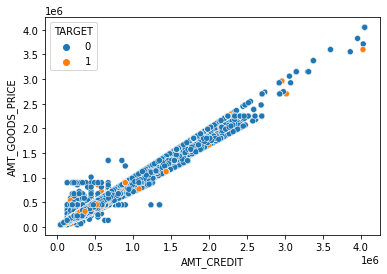

In [105]:
sns.scatterplot(data = numdata , x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', hue = 'TARGET')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

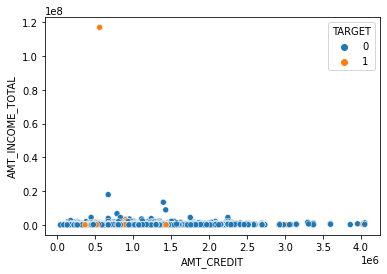

In [106]:
sns.scatterplot(data = numdata , x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL', hue = 'TARGET')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

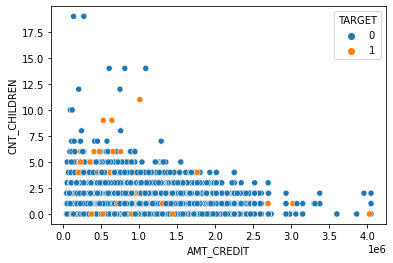

In [107]:
sns.scatterplot(data = numdata , x = 'AMT_CREDIT', y = 'CNT_CHILDREN', hue = 'TARGET')

In [108]:
amt = numdata[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE', 'TARGET']]

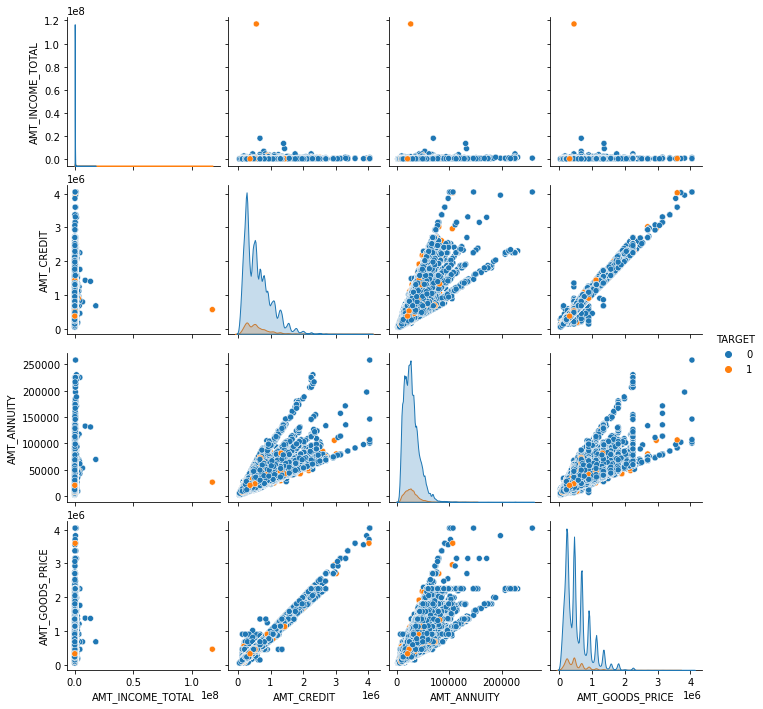

In [109]:
sns.pairplot(data = amt , hue = 'TARGET')

- amount credit and price of goods are linearly correlated
- with the increase in amount credit, defaulting rate is declining
- people with one or less than 5 child, are more likely to repay the amount
- people having income of less than 1 million and taking loans of around 1.5 million are more likely to be on defaulter side
- people paying annuity of 100k but less than 2 million are safer

In [110]:
extre.to_csv(r'C:\Users\aspire 5\OneDrive\Desktop\projects\finaldata.csv')

# Conclusion

In most of the cases its safe to give loan as we just have 8% of defaulters in whole data.
But if we focus in these 8% defaulters the overall conclusion is:
- customers having income type as "Working" as safest to give loan.
- 'students' , 'pensioner' , 'business entity type 3' have less rate of default.
- bank should be more careful with the occupation type as 'low skilled laborers'
- clients living with their parents are also in the safest zone.